<a href="https://colab.research.google.com/github/tesa0/ML_python/blob/main/DFpreparation%2BLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np 
import pandas as pd
import seaborn as sb     
import matplotlib.pyplot as plt     
import datetime
from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils   
from tensorflow.keras.optimizers import Adam, Adadelta 
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score,precision_recall_curve
from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/MA/t1_20220101_20220726_rg_201589066.csv'            # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits

df = pd.read_csv(file_path1, header=0)
df1 = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
col1= list(df1.columns) # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits
# df1.columns
df1 = df1.drop(['Unnamed: 0.1','Unnamed: 0','ym:s:from','ym:s:lastSocialNetworkProfile',
                'ym:s:lastSocialNetwork','ym:s:openstatAd','ym:s:openstatCampaign','ym:s:openstatService',
                'ym:s:openstatSource','ym:s:browserCountry','ym:s:firstGCLID','ym:s:lastDirectClickOrder',
                'ym:s:lastDirectPlatform','ym:s:lastGCLID','ym:s:lastReferalSource',
                'ym:s:lastSignificantGCLID','ym:s:networkType', 'ym:s:referer','ym:s:regionCity',
                'ym:s:UTMCampaign','ym:s:UTMContent','ym:s:UTMSource','ym:s:UTMTerm','ym:s:browserLanguage',
                'ym:s:cookieEnabled','ym:s:goalsPrice','ym:s:goalsSerialNumber',
                'ym:s:ipAddress','ym:s:impressionsProductCoupon','ym:s:offlineCallHoldDuration',
                'ym:s:offlineCallMissed','ym:s:offlineCallURL','ym:s:watchIDs'], axis=1)

In [ ]:
df1['ym:s:date'] = [pd.to_datetime(x) for x in df1['ym:s:date']]

In [47]:
df1['ym:s:lastDirectBannerGroup'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectBannerGroup']]

df1['ym:s:offlineCallTag'] = ['1' if '1' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '2' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '3' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '4' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = [1 if '1' in el else 0 for el in df1['ym:s:offlineCallTag']]

df1['ym:s:endURL'] = [x[7:] for x in df1['ym:s:endURL']]
df1['ym:s:startURL'] = [x[9:] for x in df1['ym:s:startURL']]

df1['ym:s:offlineCallTalkDuration'] = [x[1:-1] for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [x.replace("''","") for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = ['0' if x == '' else max(x.split(',')) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [int(x) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = df1['ym:s:offlineCallTalkDuration']/max(df1['ym:s:offlineCallTalkDuration'])

df1['ym:s:diagonal'] = ((df1['ym:s:screenHeight']**2+df1['ym:s:screenWidth']**2)**0.5)
df1['ym:s:diagonal'] = round(df1['ym:s:diagonal'] / max(df1['ym:s:diagonal']),2)

df1 = df1.drop(['ym:s:screenHeight', 'ym:s:screenWidth'], axis=1)

df1['ym:s:lastDirectClickBanner'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectClickBanner']]

df1['ym:s:lastDirectClickBannerName'] = [x[26:] for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = [int(x) for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = round((df1['ym:s:lastDirectClickBannerName'])/max(df1['ym:s:lastDirectClickBannerName']),2)

df1['ym:s:visitDuration'] = round((df1['ym:s:visitDuration'])/max(df1['ym:s:visitDuration']),2)

df1['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Headliner' if 'headliner' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['застройщик' if 'застройщик' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Не отказ' if 'не отказ' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['конкурент' if 'конкурент' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['запрос' if 'запрос' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2021' if '2021' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['жк' if 'жк' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['центр сити' if 'центр сити' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df1['ym:s:lastClickBannerGroupName']]

df1['ym:s:lastDirectPhraseOrCond'] = [x[23:] for x in df1['ym:s:lastDirectPhraseOrCond']]

df1['ym:s:goalsDateTime'] = [x.replace("[","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x.replace("]","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x[2:12] for x in df1['ym:s:goalsDateTime']]
df1 = df1.drop(df1[df1['ym:s:goalsDateTime']==''].index) # ---------------------------------------------
df1['ym:s:goalsDateTime'] = [datetime.strptime(x, '%Y-%m-%d') for x in df1['ym:s:goalsDateTime']]

df1['ym:s:deltaTime'] = df1['ym:s:goalsDateTime'] - df1['ym:s:date']
df1['ym:s:deltaTime'] = [x.components.days for x in df1['ym:s:deltaTime']]
df1['ym:s:deltaTime'] = df1['ym:s:deltaTime']/max(df1['ym:s:deltaTime'] )

df1 = df1.drop(['ym:s:date', 'ym:s:goalsDateTime'], axis=1)

# модель с учителем
df1['Y'] = [1 if '201589066' in el else 0 for el in df1['ym:s:goalsID']]
df1 = df1.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1)
df1 = df1.dropna(axis=1)

In [48]:
# will be categories :
# Названия колонок которые необходимо закодирвать
cols_encode = ['ym:s:lastAdvEngine', 'ym:s:deviceCategory', 'ym:s:hasGCLID', 'ym:s:isNewUser', 
               'ym:s:javascriptEnabled', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner',
               'ym:s:offlineCallTag','ym:s:pageViews','ym:s:screenOrientation','ym:s:startURL',
               'ym:s:endURL','ym:s:bounce','ym:s:lastClickBannerGroupName','ym:s:lastClickBannerGroupName',
               'ym:s:lastDirectClickOrderName','ym:s:lastDirectPhraseOrCond', 'ym:s:lastTrafficSource','ym:s:offlineCallFirstTimeCaller'] 
df1[cols_encode].replace(pd.NA,'empty') 

le = preprocessing.LabelEncoder()
for col in cols_encode:
  df1[col]=le.fit_transform(df1[col])
df1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

In [49]:
# Переносим целевой столбец на первый столбец
y = df1['Y'].copy()
df1.drop('Y',  axis=1, inplace=True)
df1.insert(len(df1.columns),'Y', y)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Y                                122948 non-null  int64  
 1   ym:s:bounce                      122948 non-null  int64  
 2   ym:s:deviceCategory              122948 non-null  int64  
 3   ym:s:endURL                      122948 non-null  int64  
 4   ym:s:hasGCLID                    122948 non-null  int64  
 5   ym:s:isNewUser                   122948 non-null  int64  
 6   ym:s:javascriptEnabled           122948 non-null  int64  
 7   ym:s:lastAdvEngine               122948 non-null  int64  
 8   ym:s:lastClickBannerGroupName    122948 non-null  int64  
 9   ym:s:lastDirectBannerGroup       122948 non-null  int64  
 10  ym:s:lastDirectClickBanner       122948 non-null  int64  
 11  ym:s:lastDirectClickBannerName   122948 non-null  float64
 12  ym

In [77]:
# Назначаем X и y
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
print(X.shape,y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применим SelectKBest для извлечения лучших признаков
model = SelectKBest(score_func=f_regression, k=17)
fit = model.fit(X_scaled,y)

(122948, 23) (122948,)


In [78]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # названия столбцов нового датафрейма
print(featureScores.nlargest(17,'Score'))  # печатаем лучшие признаки

                              Specs          Score
16     ym:s:offlineCallTalkDuration  127087.404091
15              ym:s:offlineCallTag   72715.747429
0                       ym:s:bounce     299.757330
22                   ym:s:deltaTime     243.929171
20               ym:s:visitDuration     176.558381
2                       ym:s:endURL     170.231081
14  ym:s:offlineCallFirstTimeCaller     150.357370
7     ym:s:lastClickBannerGroupName     118.355622
3                     ym:s:hasGCLID      57.029066
13           ym:s:lastTrafficSource      53.281121
4                    ym:s:isNewUser      17.435517
1               ym:s:deviceCategory      11.387105
9        ym:s:lastDirectClickBanner      10.993493
11    ym:s:lastDirectClickOrderName       7.776767
19                    ym:s:startURL       6.400325
12      ym:s:lastDirectPhraseOrCond       5.111486
6                ym:s:lastAdvEngine       4.898937


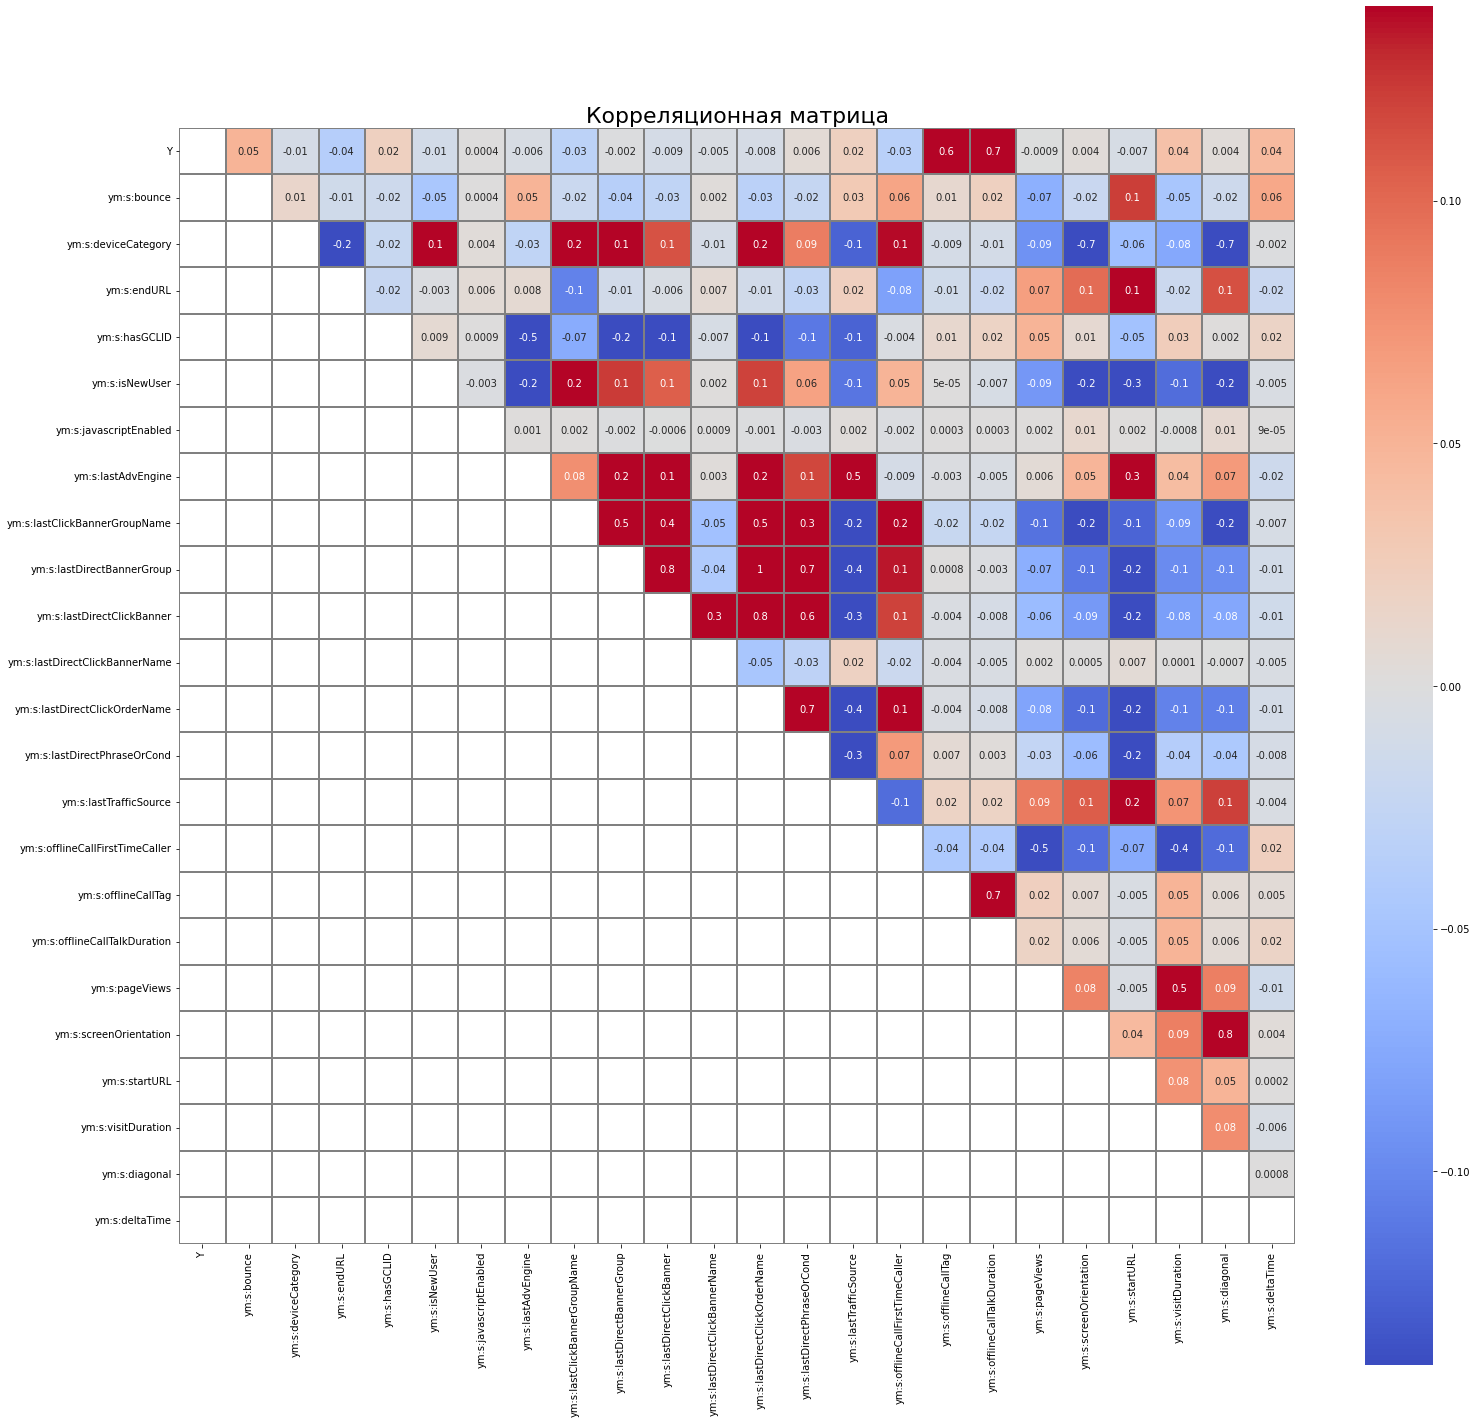

In [90]:
# Таблица корреляции признаков
mask_1 = np.tril(df1.corr())
plt.figure(figsize=(25,25))
sb.heatmap(df1.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=22)
plt.show()

Model LogReg

(122948, 8) (122948,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12181
           1       0.99      0.99      0.99       114

    accuracy                           1.00     12295
   macro avg       1.00      1.00      1.00     12295
weighted avg       1.00      1.00      1.00     12295

precision score:  0.9912280701754386
recall score:  0.9912280701754386


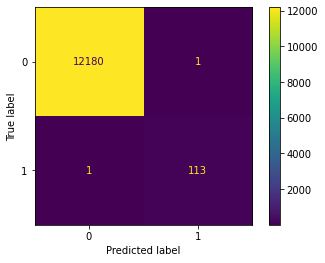

In [81]:
# берем лучшие колонки, у которых выявлена корреляция и строим регрессионную модель
cols = ['ym:s:offlineCallTalkDuration', 'ym:s:offlineCallTag','ym:s:bounce','ym:s:deltaTime','ym:s:visitDuration','ym:s:endURL','ym:s:lastClickBannerGroupName','ym:s:offlineCallFirstTimeCaller']
X = df1[cols]
y = df1['Y']
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(model,X_test,y_test)#, normalize='all')
print(classification_report(y_test,y_pred))
print('precision score: ', precision_score(y_test,y_pred))
print('recall score: ', recall_score(y_test,y_pred))

In [61]:
# https://www.learndatasci.com/glossary/binary-classification/